In [33]:
import numpy as np

# Carga de datos
data_path = 'proyecto_data\proyecto_data\proyecto_training_data.npy'
data = np.load(data_path)

# Mezclar los datos aleatoriamente para asegurar una distribución uniforme
np.random.shuffle(data)

# Dividir los datos
train_size = int(len(data) * 0.8)
train_set = data[:train_size]
test_set = data[train_size:]

print(f"Conjunto de entrenamiento: {train_set.shape}")
print(f"Conjunto de prueba: {test_set.shape}")


Conjunto de entrenamiento: (1168, 6)
Conjunto de prueba: (292, 6)


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\samcr\AppData\Local\Temp\ipykernel_23196\1315583973.py:4: SyntaxWarning: invalid escape sequence '\p'
  data_path = 'proyecto_data\proyecto_data\proyecto_training_data.npy'


Analisis exploratorio

           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   177733.061644     6.073630  1154.495719      6.471747  1970.721747   
std     74172.358778     1.371664   374.477066      1.606293    30.027159   
min     34900.000000     1.000000   334.000000      2.000000  1875.000000   
25%    129000.000000     5.000000   882.000000      5.000000  1953.750000   
50%    160000.000000     6.000000  1090.500000      6.000000  1972.000000   
75%    210250.000000     7.000000  1384.500000      7.000000  2000.000000   
max    625000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count   960.000000  
mean     69.430208  
std      24.730104  
min      21.000000  
25%      57.750000  
50%      68.000000  
75%      80.000000  
max     313.000000  


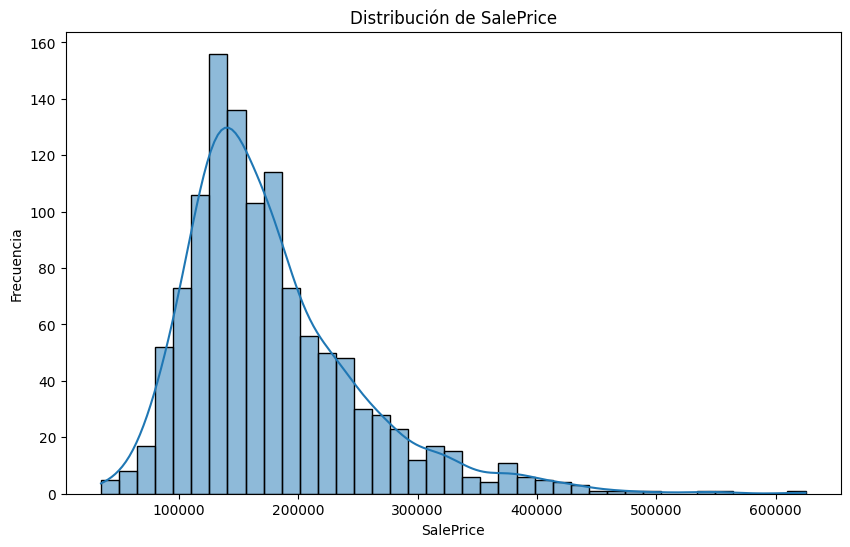

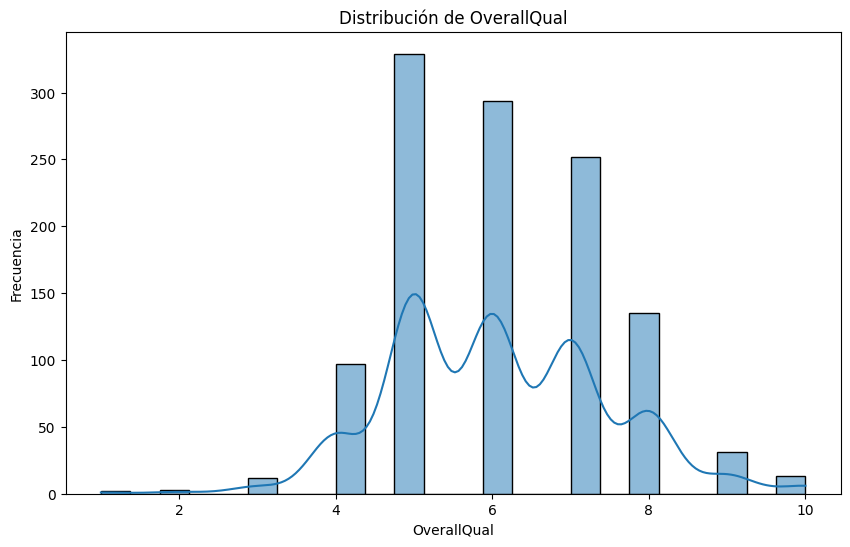

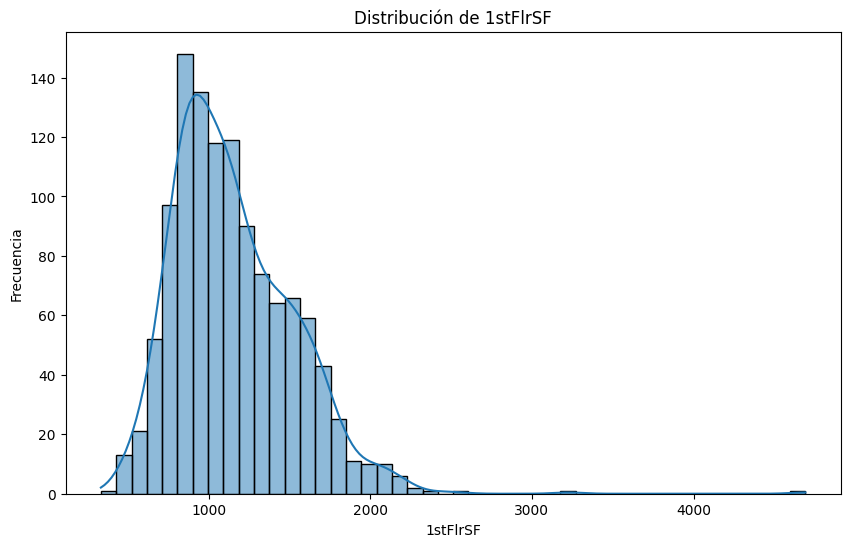

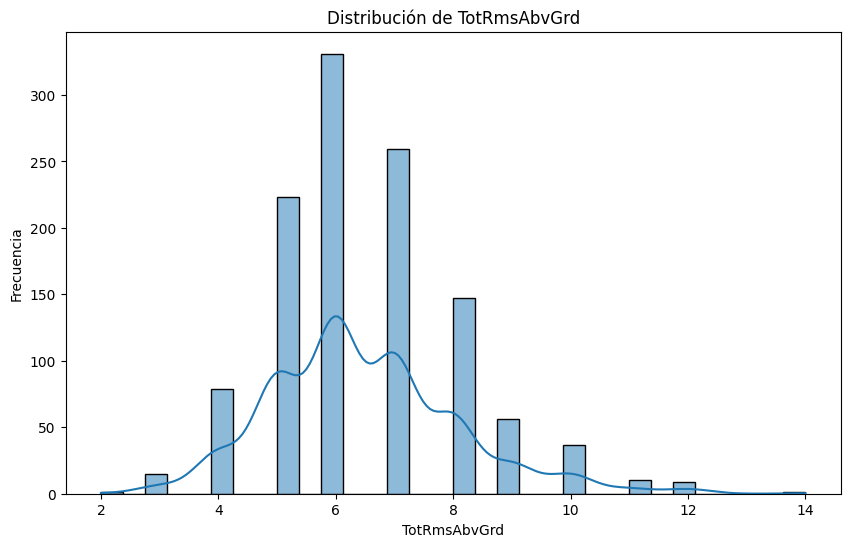

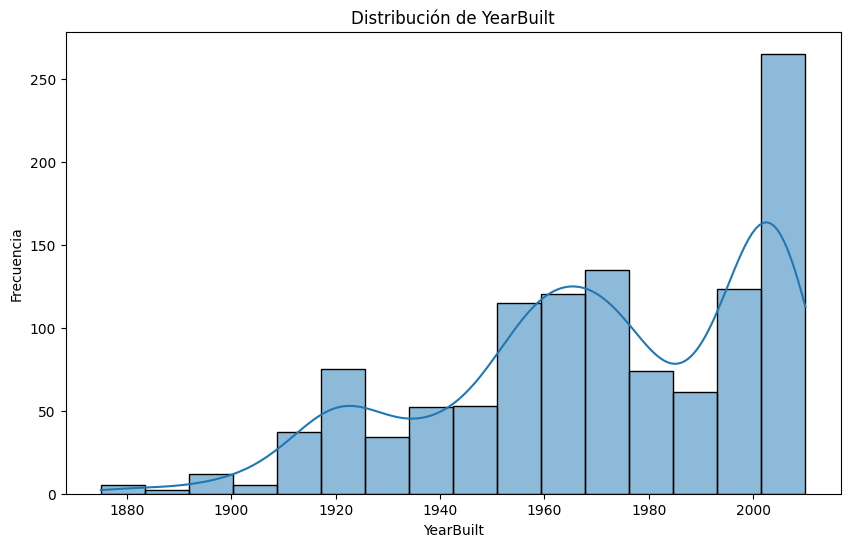

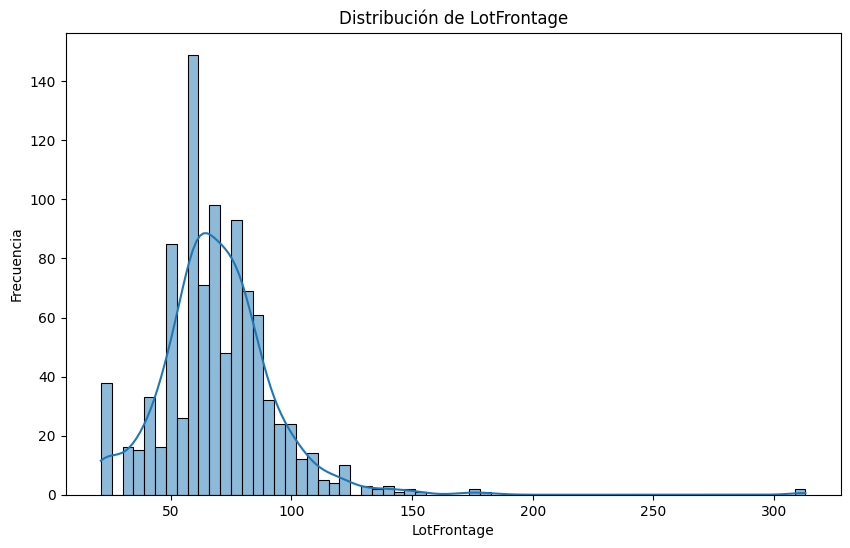

In [34]:
import pandas as pd

# Convertir a DataFrame para facilitar el análisis
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_train = pd.DataFrame(train_set, columns=column_names)

# Estadísticas básicas
print(df_train.describe())

# Histogramas para cada variable
import seaborn as sns
import matplotlib.pyplot as plt

for column in column_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Correlación y Selección de Variables

SalePrice       1.000000
OverallQual     0.798752
1stFlrSF        0.596564
YearBuilt       0.529507
TotRmsAbvGrd    0.518322
LotFrontage     0.341479
Name: SalePrice, dtype: float64


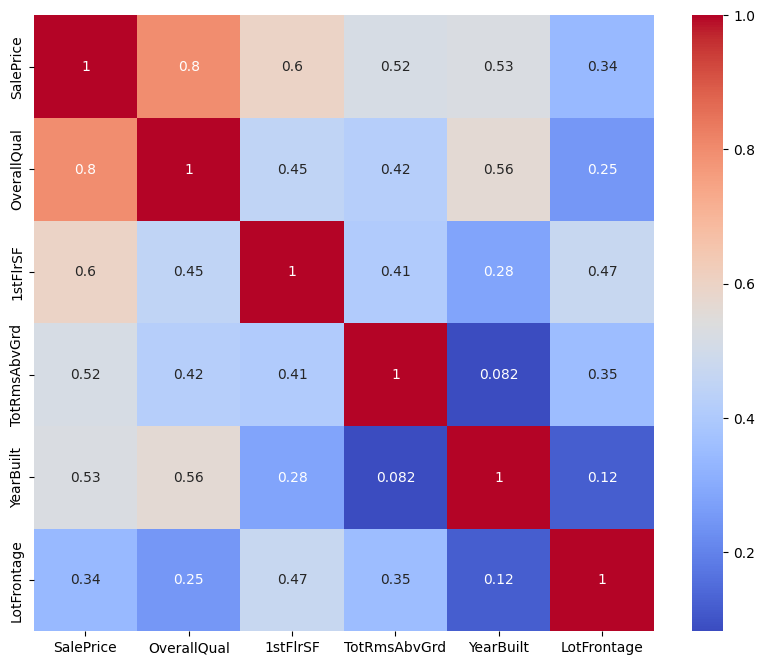

In [35]:
# Calcular la matriz de correlación
correlation_matrix = df_train.corr()
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

# Visualización de correlaciones con SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Entrenamiento de Modelos de Regresión Lineal Univariable

In [36]:
def train_linear_regression(X, y, epochs, learning_rate, print_every):
    # Añadir columna de unos para el término de intercepto
    X_b = np.c_[np.ones((len(X), 1)), X]
    # Inicializar los parámetros de manera aleatoria
    theta = np.random.randn(2, 1)
    m = len(X)
    cost_history = []

    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = np.sum((X_b.dot(theta) - y) ** 2) / m
        cost_history.append(cost)

        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history


Entrenar y Evaluar el Modelo

In [37]:

X_overallqual = df_train['OverallQual'].values.reshape(-1, 1)
y_saleprice = df_train['SalePrice'].values.reshape(-1, 1)

theta_overallqual, cost_history_overallqual = train_linear_regression(X_overallqual, y_saleprice, epochs=1000, learning_rate=0.01, print_every=100)


Epoch 0, Cost: 3841590944.9189067
Epoch 100, Cost: 2308345842.743808
Epoch 200, Cost: 2253388167.6325436
Epoch 300, Cost: 2207912815.637535
Epoch 400, Cost: 2170283719.521602
Epoch 500, Cost: 2139147096.881331
Epoch 600, Cost: 2113382745.1027045
Epoch 700, Cost: 2092063739.8193798
Epoch 800, Cost: 2074423086.9446013
Epoch 900, Cost: 2059826128.5165346


Visualización del Modelo y del Error a lo Largo del Tiempo

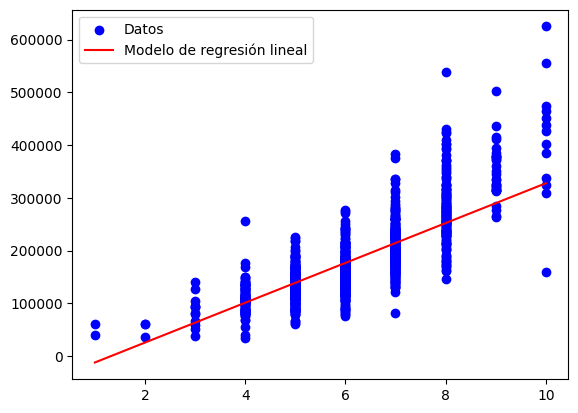

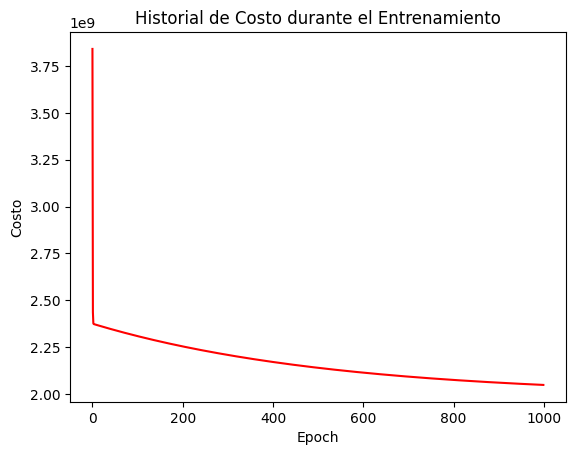

In [38]:
def plot_model(X, y, theta):
    plt.scatter(X, y, color='blue', label='Datos')
    line_X = np.array([[X.min()], [X.max()]])
    line_y = np.array([[1, X.min()], [1, X.max()]]).dot(theta)
    plt.plot(line_X, line_y, color='red', label='Modelo de regresión lineal')
    plt.legend()
    plt.show()

def plot_cost_history(cost_history):
    plt.plot(cost_history, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Costo')
    plt.title('Historial de Costo durante el Entrenamiento')
    plt.show()

# Visualización para OverallQual
plot_model(X_overallqual, y_saleprice, theta_overallqual)
plot_cost_history(cost_history_overallqual)

 Preparación del Conjunto de Prueba

In [39]:
# Creando arrays para el conjunto de prueba
df_test = pd.DataFrame(test_set, columns=column_names)
X_test_overallqual = df_test['OverallQual'].values.reshape(-1, 1)
y_test = df_test['SalePrice'].values.reshape(-1, 1)


Evaluación de los Modelos

Evaluaremos nuestros modelos entrenados calculando el error en el conjunto de prueba. Utilizaremos el error cuadrático medio (MSE) como nuestra métrica de evaluación.

In [40]:
def predict(X, theta):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Añadir columna de unos para el intercepto
    return X_b.dot(theta)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Predicciones y evaluación para OverallQual
y_pred_overallqual = predict(X_test_overallqual, theta_overallqual)
mse_overallqual = mse(y_test, y_pred_overallqual)


print(f"MSE para OverallQual: {mse_overallqual}")


MSE para OverallQual: 4177140284.7700105


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definiendo los conjuntos de entrenamiento para OverallQual y 1stFlrSF, y el conjunto de salida (SalePrice)
X_train_overallqual = df_train['OverallQual'].values.reshape(-1, 1)
X_train_1stflrsf = df_train['1stFlrSF'].values.reshape(-1, 1)
y_train = df_train['SalePrice'].values.reshape(-1, 1)

# Entrenamiento y evaluación usando Scikit-learn para OverallQual
lr_overallqual = LinearRegression()
lr_overallqual.fit(X_train_overallqual, y_train)
y_pred_lr_overallqual = lr_overallqual.predict(X_test_overallqual)
mse_lr_overallqual = mean_squared_error(y_test, y_pred_lr_overallqual)


print(f"MSE para OverallQual con Scikit-learn: {mse_lr_overallqual}")


MSE para OverallQual con Scikit-learn: 3915091981.193566
